In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from resources.functions.explore_feature import explore_feature
from resources.functions.cross_feature import cross_feature
from resources.functions.scale_data import normalize_df, standardize_df
from resources.functions.get_outliers import get_outlier_zscore_per_feature, get_outlier_index_list
from resources.properties import PATH_TRAIN

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (16.0, 12.0)

In [2]:
df_train = pd.read_csv(PATH_TRAIN, index_col=0)

In [3]:
file_number_to_save = '2'

# Data Cleaning
1. Address the null values: in the third place, study a convenient way to take care of the null values present in the dataset.
2. Feature Explotarion: next, take a close look at the features and separete numerical values from categorical, if they exist.
3. Study the correlation: during this step the correlation, between the features (X) and the Target (y), and how these features affect in the prediction of the Target, is studied.

---
## 1. Address the null values:
Now, let's get rid of those 15 rows that contains null values.
This is the better approach given the quantity of rows affected and the structure of the dataset.

In [4]:
df_train.dropna(axis=0, how='any', inplace=True)
df_train.reset_index(inplace=True)
df_train.drop(columns='ID', inplace=True)
df_train.shape # 1704 rows, which is correct because just 15 rows were deleted

(1704, 17)

---
## 2. Feature exploration:

In [5]:
explore_feature(df_train)

{'PanelA': array(['A', 'B'], dtype=object),
 'PanelB': array(['A', 'B'], dtype=object),
 'PanelC': array(['A', 'B'], dtype=object),
 'PanelD': array(['B', 'A'], dtype=object),
 'PanelE': array(['B', 'A'], dtype=object),
 'PanelF': array(['B', 'A', 'C', 'D'], dtype=object),
 'PanelG': array(['B', 'C', 'A', 'D'], dtype=object),
 'PanelH': array(['A', 'C', 'D', 'E', 'B'], dtype=object),
 'Sensor1': {'min': 11.0,
  'mean': 24.788227699530534,
  'std': 8.101841719811532,
  'max': 125.48},
 'Sensor2': {'min': 0.14,
  'mean': 1.789865023474179,
  'std': 2.720184321255864,
  'max': 111.5},
 'Sensor3': {'min': 1.53,
  'mean': 86.30539906103293,
  'std': 26.064310823902062,
  'max': 173.0},
 'Sensor4': {'min': 1.0,
  'mean': 2.416742957746476,
  'std': 0.5506130802931893,
  'max': 7.52},
 'Sensor5': {'min': 1.0,
  'mean': 2.6813028169014066,
  'std': 0.7898725183667252,
  'max': 6.0},
 'Sensor6': {'min': 1.0,
  'mean': 2.017934272300471,
  'std': 0.6606539264053078,
  'max': 12.17},
 'Sensor7': 

### Let's separate the data in numerical and categorical features:

In [6]:
y = df_train.Target
X = df_train.drop(axis=1, columns='Target')

X_numer = X.select_dtypes(include=[np.number])
X_categ = X.select_dtypes(exclude=[np.number])

### On numeric data:
Study the possibility of feature crossing, normalizing and standardizing.

In [7]:
## Normalize:
# X_numer = normalize_df(X_numer)

## Standardize:
# X_numer = standardize_df(X_numer)

## Cross feature
# X_numer = cross_feature(X_numer)

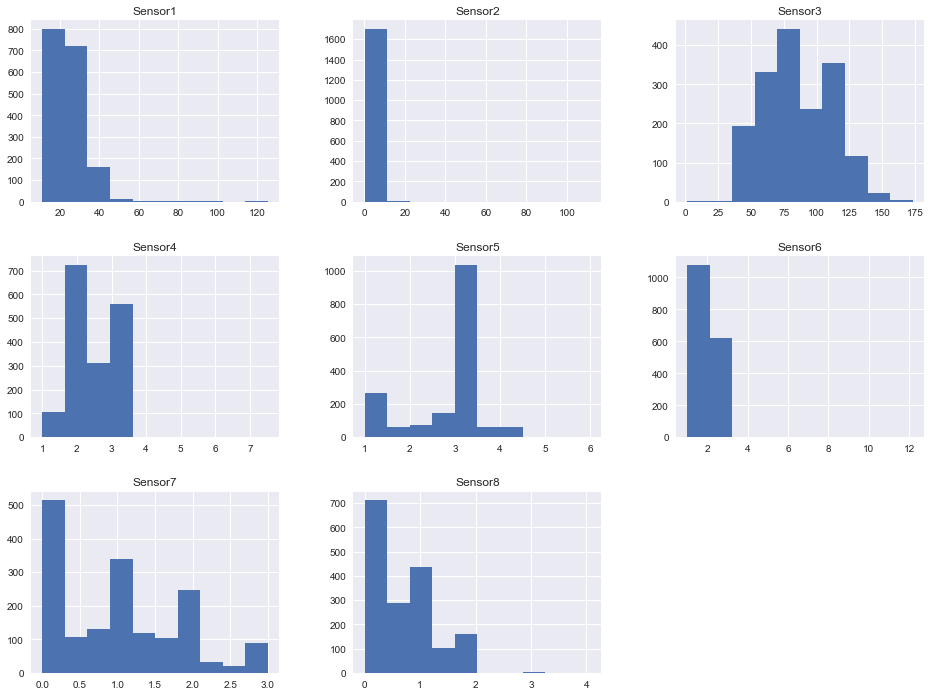

In [8]:
X_numer.hist();

### and now let's look for outliers

In [9]:
outlier_index_list = get_outlier_index_list(get_outlier_zscore_per_feature, X_numer)
len(outlier_index_list)

458

In [10]:
X_numer = standardize_df(X_numer)

### On categorical data:
Apply get_dummies

In [11]:
X_categ = pd.get_dummies(X_categ)
X_categ.columns

Index(['PanelA_A', 'PanelA_B', 'PanelB_A', 'PanelB_B', 'PanelC_A', 'PanelC_B',
       'PanelD_A', 'PanelD_B', 'PanelE_A', 'PanelE_B', 'PanelF_A', 'PanelF_B',
       'PanelF_C', 'PanelF_D', 'PanelG_A', 'PanelG_B', 'PanelG_C', 'PanelG_D',
       'PanelH_A', 'PanelH_B', 'PanelH_C', 'PanelH_D', 'PanelH_E'],
      dtype='object')

---
## 3. Study the correlation between X and y 

In [12]:
X = pd.concat([X_categ, X_numer], axis=1)
df_train = pd.concat([X, y],axis=1)
df_train.drop(index=outlier_index_list, inplace=True)

In [ ]:
# df_train.to_csv(f'cleaned-data/stan-dum-zscore-{file_number_to_save}.csv')